In [1]:
import numpy as np
from scipy import linalg
from scipy.special import binom
import matplotlib.pyplot as plt
import itertools as it
import copy
import stomp_functions as stf
import time
import os
import re
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [ ]:
class TOLcmaps(object):
    """
    Class TOLcmaps definition.
    """
    def __init__(self):
        """
        """
        self.cmap = None
        self.cname = None
        self.namelist = (
            'rainbow_PuRd',)

        self.funcdict = dict(
            zip(self.namelist,
                (self.__rainbow_PuRd,
                )
               )
        )
        
    def __rainbow_PuRd(self):
        """
        Define colormap 'rainbow_PuRd'.
        """
        clrs = ['#6F4C9B', '#6059A9', '#5568B8', '#4E79C5', '#4D8AC6',
                '#4E96BC', '#549EB3', '#59A5A9', '#60AB9E', '#69B190',
                '#77B77D', '#8CBC68', '#A6BE54', '#BEBC48', '#D1B541',
                '#DDAA3C', '#E49C39', '#E78C35', '#E67932', '#E4632D',
                '#DF4828', '#DA2222']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')
        
    def get(self, cname='rainbow_PuRd', lut=None):
        """
        Return requested colormap, default is 'rainbow_PuRd'.
        """
        self.cname = cname
        if cname == 'rainbow_discrete':
            self.__rainbow_discrete(lut)
        else:
            self.funcdict[cname]()
        return self.cmap

In [ ]:
def tol_cmap(colormap=None, lut=None):
    """
    Continuous and discrete color sets for ordered data.
    
    Return a matplotlib colormap.
    Parameter lut is ignored for all colormaps except 'rainbow_discrete'.
    """
    obj = TOLcmaps()
    if colormap is None:
        return obj.namelist
    if colormap not in obj.namelist:
        colormap = 'rainbow_PuRd'
        print('*** Warning: requested colormap not defined,',
              'known colormaps are {}.'.format(obj.namelist),
              'Using {}.'.format(colormap))
    return obj.get(colormap, lut)

In [2]:
def create_H(N, g, j):
    z_ops, x_ops = stf.construct_op_lists(N)
    
    # Construct the Hamiltonian
    # Loop over sites to construct parts of H
    H_qis = 0
    for n in range(N-1):
        H_qis += -j * z_ops[n] @ z_ops[n+1]
        for m in range(N):
            H_qis += -j * g * x_ops[n]

    return H_qis

In [3]:
# Set font size of plot elements
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# Define Hamiltonian parameters
N = 3
g = 2
j = 1

In [5]:
# Create the Hamiltonian
H = create_H(N, g, j)

# Get energy eigenvalues
E = linalg.eigvalsh(H.to_matrix())

In [6]:
# Define filenames for reading data
ovlp_file = "estimator_ovlp_N=3_ibm_brisbane_b=1_numsteps=100.npz"
H_ovlp_file = "estimator_H_ovlp_N=3_ibm_brisbane_b=1_numsteps=100.npz"

In [7]:
# Load in data
ovlp_data = np.load(ovlp_file, allow_pickle=True)
H_ovlp_data = np.load(H_ovlp_file, allow_pickle=True)

In [8]:
# Get beta value and numsteps from filename
τ = float(re.search(r'b=\d', ovlp_file).group(0)[2:])
num_steps = int(re.search(r'numsteps=\d+', ovlp_file).group(0)[9:])
τs, dτ = np.linspace(0, τ, num_steps, retstep=True)

In [9]:
z = ovlp_data['12661']
O = H_ovlp_data['12661']

In [10]:
calc_E = {}
for λ in E:
    calc_E[λ] = stf.alt_partition_calc(z, O, num_steps, λ, dτ)[1][1:] - λ

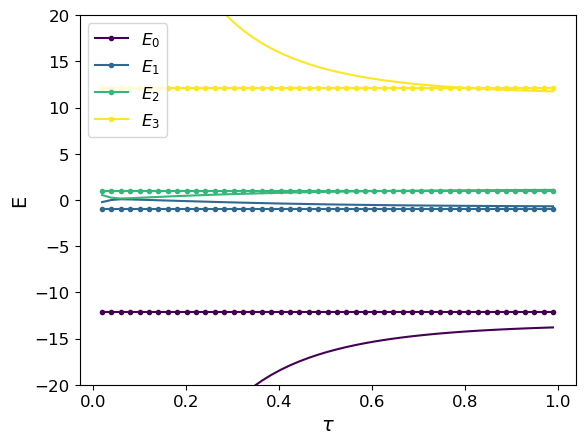

In [13]:
colors = tol_cmap('rainbow_PuRd').resampled(len(list(calc_E.values())))
for i, λ in enumerate(E[::2]):
    plt.plot(τs[2::2], calc_E[λ], color=colors[i])
    plt.plot(τs[2::2], λ * np.ones(τs[2::2].shape[0]), '.-',
             color=colors(i), label='$E_'+str(i)+'$')
plt.xlabel("$\\tau$")
plt.ylabel("E")
plt.ylim([-20, 20])
plt.legend()